# Predicting Employee Promotion (Notebook 1)
This project aims to predict which employees are most likely to be promoted based on a dataset that includes various features such as performance metrics, work experience, and other relevant factors. The dataset, hr_data.csv, contains detailed information on employees, including personal information, education background, past performance, and more. 

This is an improved version of my Machine Learning assignment, which was part of my Diploma of Information Technology Machine Learning course at Polytechnic. This first notebook focuses on data understanding and data cleaning processes. It uses a messy dataset from a CSV file named hr_data.csv. The output of this notebook is a cleaned CSV file named listings_new.csv, which will be used in the subsequent steps. 

#### Data Dictionary (Before data understanding and data preparation) 
* **employee_id**: Unique ID for employee <br />
* **department**: Department of employee <br />
* **region**: Region of employment (unordered) <br />
* **education**: Education Level <br />
* **gender**: Gender of Employee <br />
* **recruitment_channel**: Channel of recruitment for employee <br />
* **no_of_trainings**: no of other trainings completed in previous year on soft skills, technical skills etc. <br />
* **age**: Age of Employee <br />
* **previous_year_rating**: Employee Rating for the previous year <br />
* **length_of_service**: Length of service in years <br />
* **KPIs_met >80%**: 1 = if Percent of Key performance Indicators > 80%, not = 0 <br />
* **awards_won?**: 1 = if awards won during previous year, not = 0 <br />
* **avg_training_score**: Average score in current training evaluations <br />
* **is_promoted**: (Target) 1 = Recommended for promotion, not = 0 <br />

### 1.1 Load and Explore the data

In [2]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load hr_data.csv dataset into a DataFrame
df_hr = pd.read_csv('hr_data.csv')

# Create a copy of the DataFrame to do exploration
df_hr_new = df_hr.copy() 

#get no. of rows & columns
df_hr_new.shape

(54808, 14)

In [5]:
df_hr_new.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [6]:
df_hr_new.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [7]:
df_hr_new['is_promoted'].value_counts() #get count of each of the distinct values

is_promoted
0    50140
1     4668
Name: count, dtype: int64

###### 1.1.1 Numeric Data in df_hr_new

In [9]:
df_hr_num = df_hr_new.select_dtypes(['int64', 'float64']).copy() #create new DataFrame for numeric data
df_hr_num.shape

(54808, 9)

In [10]:
df_hr_num.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [11]:
df_hr_num['is_promoted'].value_counts() #get count of each of the distinct values (1 and 0) for is_promoted variabledf_hr_num

is_promoted
0    50140
1     4668
Name: count, dtype: int64

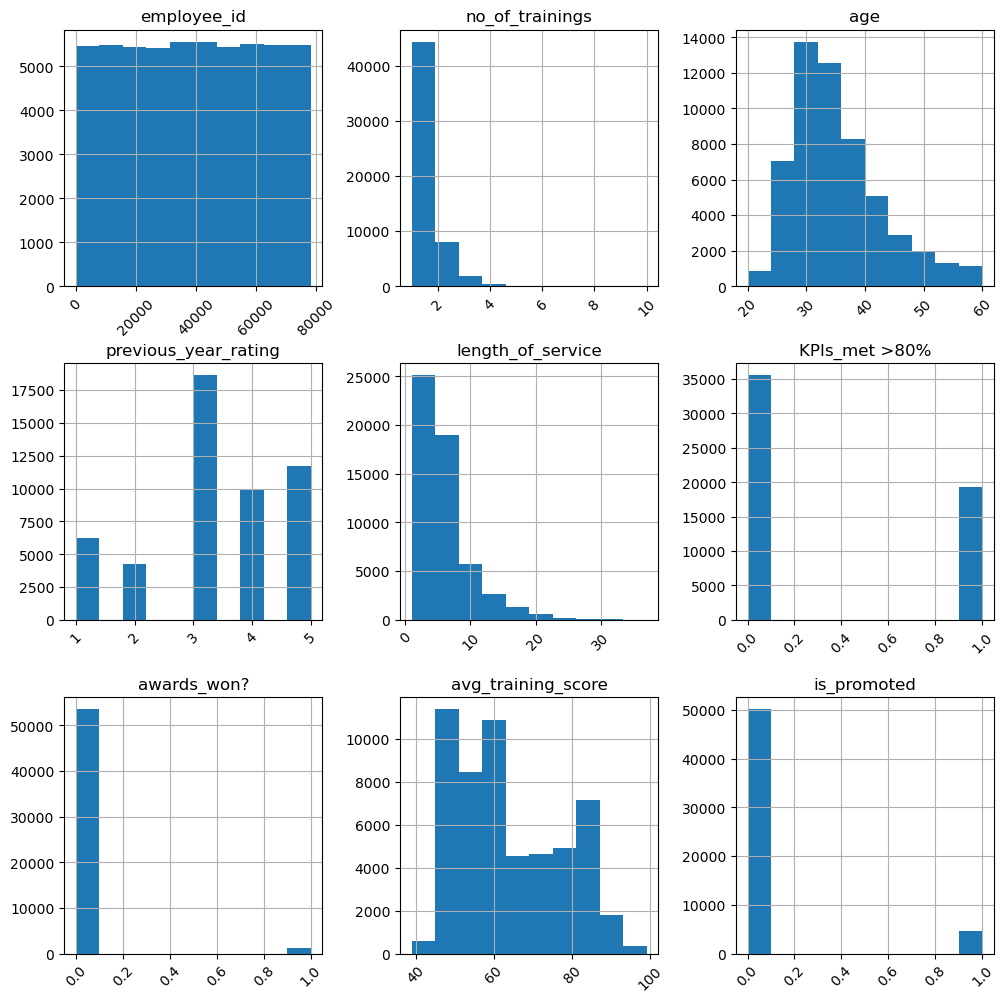

In [12]:
df_hr_num.hist(figsize=(12,12), xrot=45) #plot a histogram grid of the numeric variables
plt.show()

###### 1.1.2 Categorical Data in df_hr_new

In [14]:
df_hr_cat = df_hr_new.select_dtypes(['object']).copy() #create new DataFrame for categorical data
df_hr_cat.shape

(54808, 5)

In [15]:
df_hr_cat.describe() #get the count, no of unique elements in df_hr_cat

,department,region,education,gender,recruitment_channel
count,54808,54808,52399,54808,54808
unique,9,34,3,2,3
top,Sales & Marketing,region_2,Bachelor's,m,other
freq,16840,12343,36669,38496,30446


In [16]:
for col in df_hr_cat:
    print(col)
    print(df_hr_cat[col].unique(),'\n')

department
['Sales & Marketing' 'Operations' 'Technology' 'Analytics' 'R&D'
 'Procurement' 'Finance' 'HR' 'Legal'] 

region
['region_7' 'region_22' 'region_19' 'region_23' 'region_26' 'region_2'
 'region_20' 'region_34' 'region_1' 'region_4' 'region_29' 'region_31'
 'region_15' 'region_14' 'region_11' 'region_5' 'region_28' 'region_17'
 'region_13' 'region_16' 'region_25' 'region_10' 'region_27' 'region_30'
 'region_12' 'region_21' 'region_8' 'region_32' 'region_6' 'region_33'
 'region_24' 'region_3' 'region_9' 'region_18'] 

education
["Master's & above" "Bachelor's" nan 'Below Secondary'] 

gender
['f' 'm'] 

recruitment_channel
['sourcing' 'other' 'referred'] 



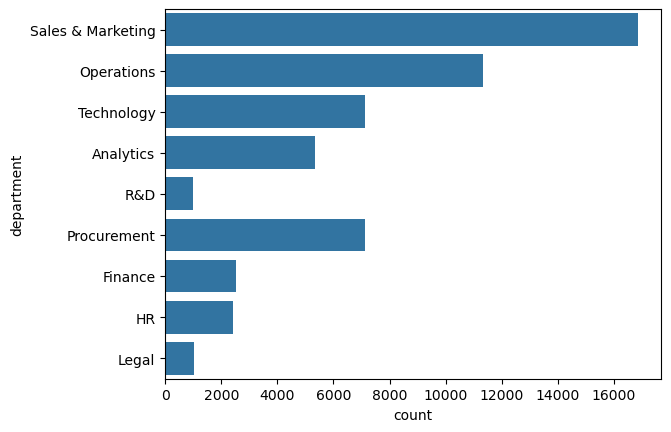

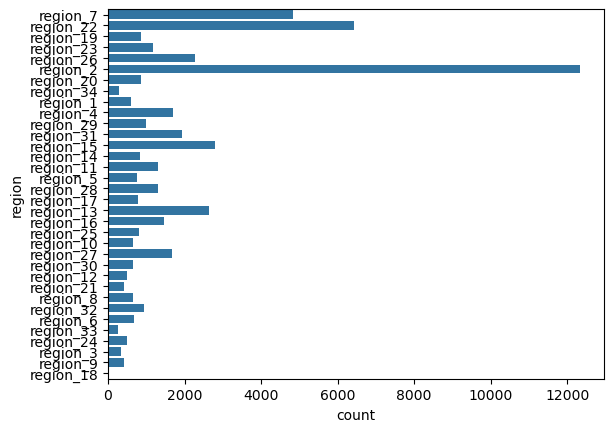

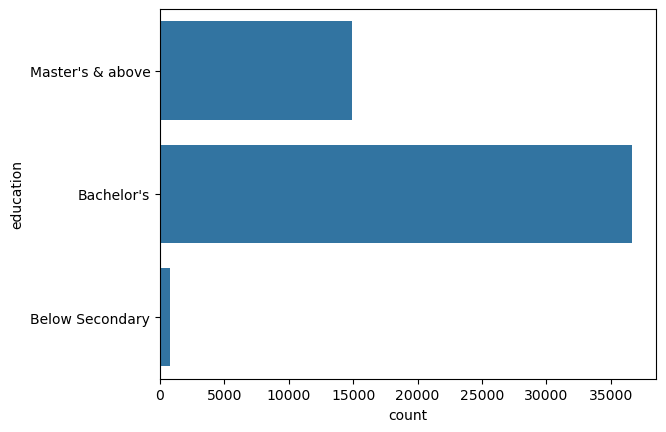

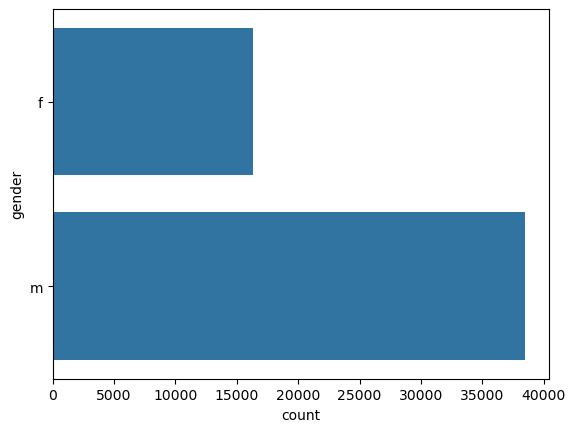

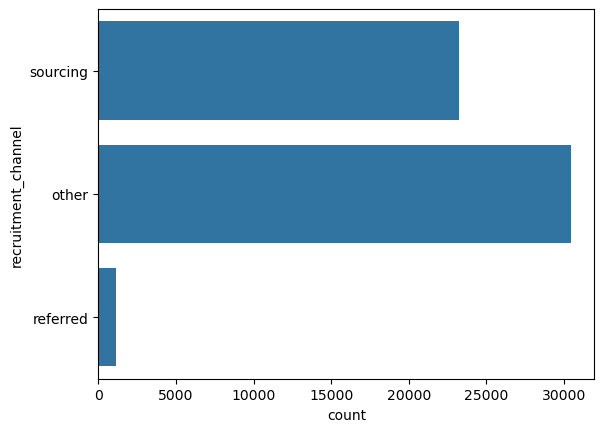

In [17]:
for col in df_hr_cat:
    sns.countplot(y=col, data=df_hr_cat)
    plt.show()

### 1.2 Cleanse and Transform the data

#### Types of Messy Data Checklist
1. Irrelevant Features
2. Duplicate Values
3. Missing Values - reviews_per_month
4. Outliers - price, minimum_nights
5. Imbalanced Data
6. Categorical Data
7. Continuous features like price, number_of_reviews, availability_365

###### 1.2.1 Drop Irrelevant Features

In [20]:
df_hr_new.drop('employee_id', inplace=True, axis=1)

###### 1.2.2 Duplicate Values 

In [22]:
df_hr_new.duplicated().sum()

118

###### 1.2.3 Missing Values 

In [24]:
df_hr_new.isnull().sum() #identify which column name has missing values

department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

C:\Users\julia\AppData\Local\Temp\ipykernel_6500\1319407794.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='education', data=df_hr_new, palette=['green', 'blue', 'orange']).set(title='No. of Employees based on Education Level')


Text(0.5, 1.0, 'No. of Promoted Employees based on their Recruitment Channel')

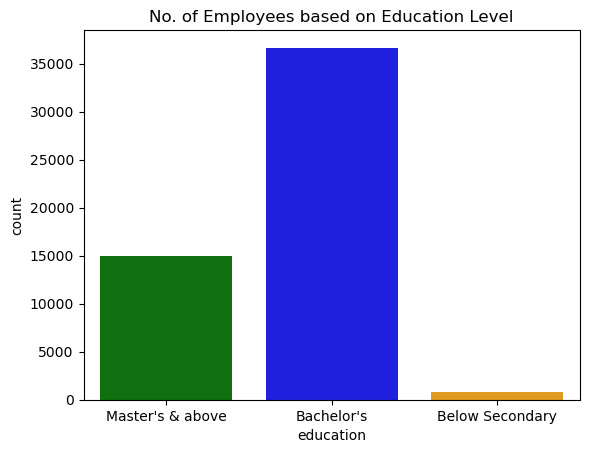

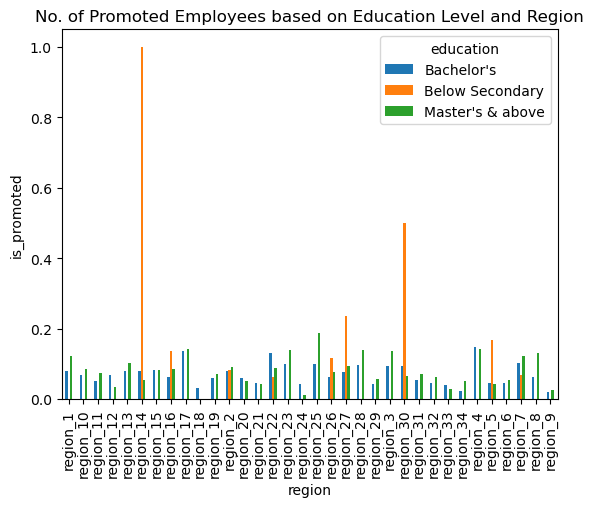

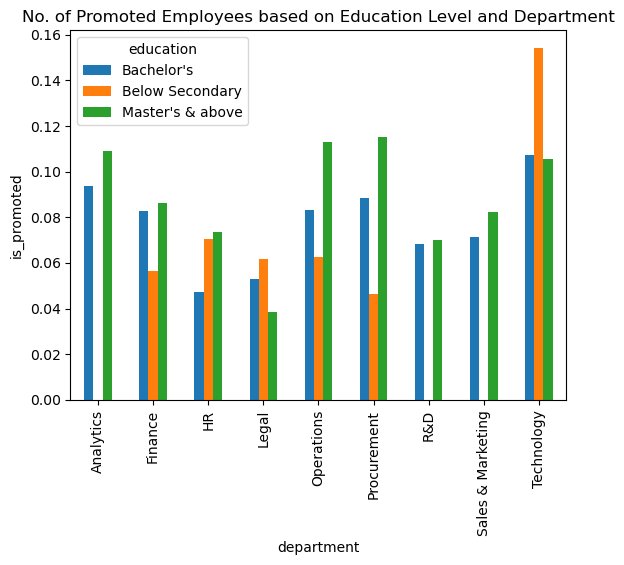

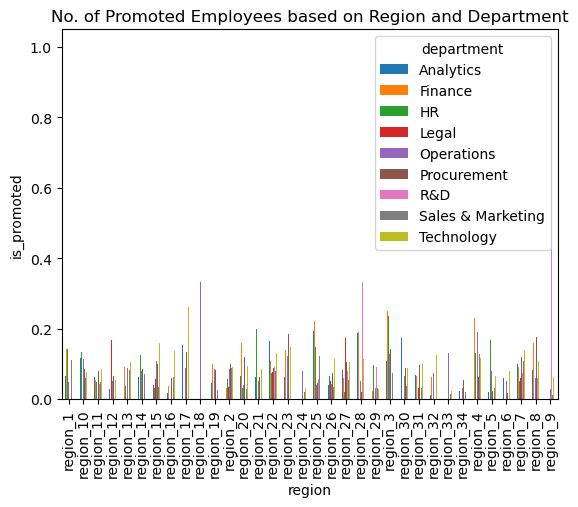

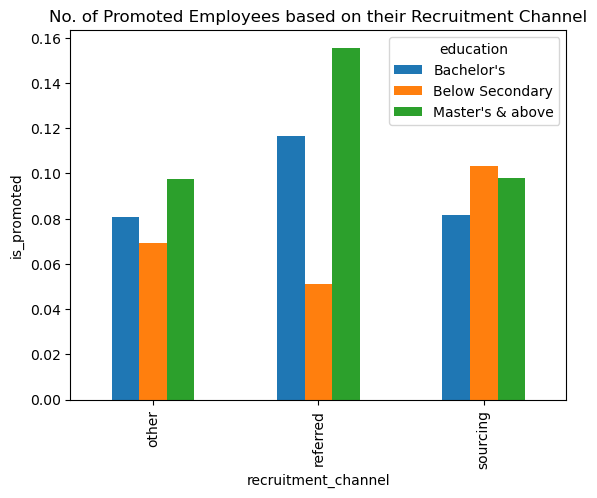

In [25]:
#1a. education - investigate cause of missing values

#visualize the education column with other columns

#how many employees are there for each education level?
ax = sns.countplot(x='education', data=df_hr_new, palette=['green', 'blue', 'orange']).set(title='No. of Employees based on Education Level')

#for each region, what is the number of employees getting promoted in each education level?
df_hr_new.groupby(['education','region']).is_promoted.mean().unstack(0).plot.bar()
plt.ylabel('is_promoted')
plt.title('No. of Promoted Employees based on Education Level and Region')

#for each department, what is the number of employees getting promoted in each education level?
df_hr_new.groupby(['education','department']).is_promoted.mean().unstack(0).plot.bar()
plt.ylabel('is_promoted')
plt.title('No. of Promoted Employees based on Education Level and Department')

#for each department, what is the number of employees getting promoted in each region?
df_hr_new.groupby(['department', 'region']).is_promoted.mean().unstack(0).plot.bar()
plt.ylabel('is_promoted')
plt.title('No. of Promoted Employees based on Region and Department')

#for each department, what is the number of employees getting promoted in each recruitment channel?
df_hr_new.groupby(['education','recruitment_channel']).is_promoted.mean().unstack(0).plot.bar()
plt.ylabel('is_promoted')
plt.title('No. of Promoted Employees based on their Recruitment Channel')

In [43]:
df_hr_new['education'].value_counts() #get count of each of the distinct values for education 

education
Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: count, dtype: int64

C:\Users\julia\AppData\Local\Temp\ipykernel_6500\743081837.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='education', data=df_hr_new, palette=['green', 'blue', 'orange']).set(title='No. of Employees based on Education Level')


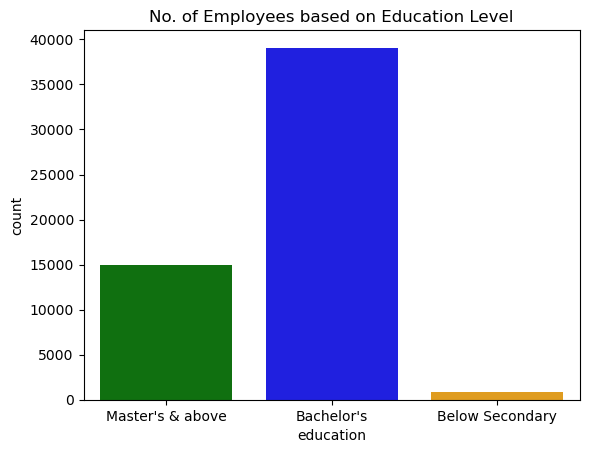

In [45]:
#1b. education - handle missing values

#fill the null values with Bachelor's which is the mode
df_hr_new['education'] = df_hr_new['education'].fillna('Bachelor\'s') 
ax = sns.countplot(x='education', data=df_hr_new, palette=['green', 'blue', 'orange']).set(title='No. of Employees based on Education Level')

In [47]:
# 2b. previous_year_rating - handle missing values

#fill the null values with 0 = no rating (as they were not in the company yet)
df_hr_new.loc[df_hr_new['previous_year_rating'].isna(),'previous_year_rating'] =3

In [49]:
df_hr_new.isnull().sum() #check that imputation of values was successful

department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [51]:
df_hr_new['is_promoted'].value_counts()

is_promoted
0    50140
1     4668
Name: count, dtype: int64

###### (IMPROVEMENT) 1.2.4 Stratified Sampling 

In [54]:
# (IMPROVEMENT) 1.2.4 Stratified Sampling 
#f_hr_new.groupby('is_promoted', group_keys=False).apply(lambda x: x.sample(1000)) #ensure that there is a 50-50 ratio for is_promoted so there is no sampling bias

###### 1.2.5 Encode Categorical Data Columns

In [57]:
#display the old values
df_hr_new[['department', 'region', 'education', 'gender', 'recruitment_channel']].head() 

,department,region,education,gender,recruitment_channel
0,Sales & Marketing,region_7,Master's & above,f,sourcing
1,Operations,region_22,Bachelor's,m,other
2,Sales & Marketing,region_19,Bachelor's,m,sourcing
3,Sales & Marketing,region_23,Bachelor's,m,other
4,Technology,region_26,Bachelor's,m,other


In [59]:
#1. department - use mapping
#1 = Sales & Marketing, 2 = Operations, 3 = Technology, 4 = Analytics, 5 = R&D, 6 = Procurement, 7 = Finance, 8 = HR, 9 = Legal
dept_mapping = {"Sales & Marketing": 1, "Operations": 2, "Technology": 3, "Analytics": 4, "R&D": 5, "Procurement": 6, "Finance": 7, "HR": 8, "Legal": 9}
df_hr_new['department'] = df_hr_new['department'].map(dept_mapping).astype(int)

#2. region - remove the "region_" & keep the number
df_hr_new['region'] = df_hr_new['region'].str[7:].astype(int)

#3. education - use mapping
#1 = Master's & above, 2 = Bachelor's, 3 = Below Secondary
df_hr_new['education'] = df_hr_new['education'].map( {'Master\'s & above': 1, 'Bachelor\'s': 2, 'Below Secondary': 3} ).astype(int)

#4. gender - use mapping
#1 = Female, 2 = Male
df_hr_new['gender'] = df_hr_new['gender'].map( {'f': 1, 'm': 2} ).astype(int)

#5. recruitment_channel - use mapping
#1 = sourcing, 2 = other, 3 = referred
df_hr_new['recruitment_channel'] = df_hr_new['recruitment_channel'].map( {'sourcing': 1, 'other': 2, 'referred': 3} ).astype(int)


#display the new values
df_hr_new[['department', 'region', 'education', 'gender', 'recruitment_channel']].head() 

,department,region,education,gender,recruitment_channel
0,1,7,1,1,1
1,2,22,2,2,2
2,1,19,2,2,1
3,1,23,2,2,2
4,3,26,2,2,2


###### 1.2.6 Outliers in Continous Data Columns

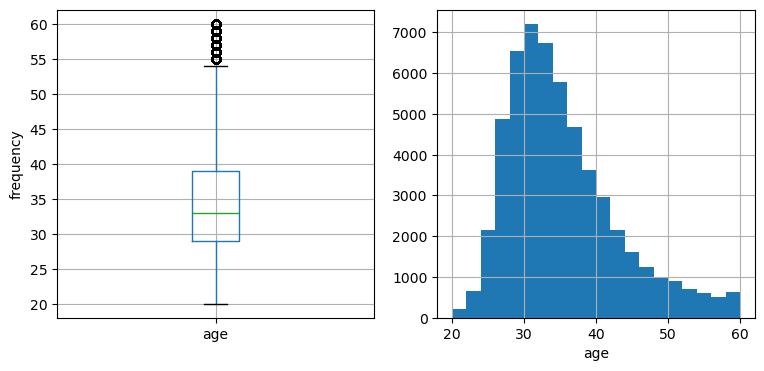

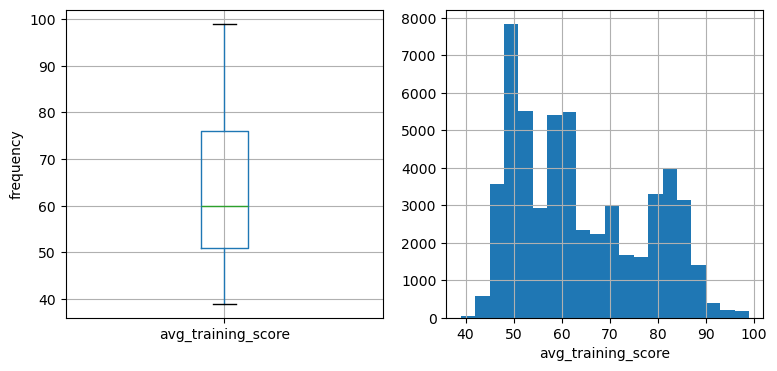

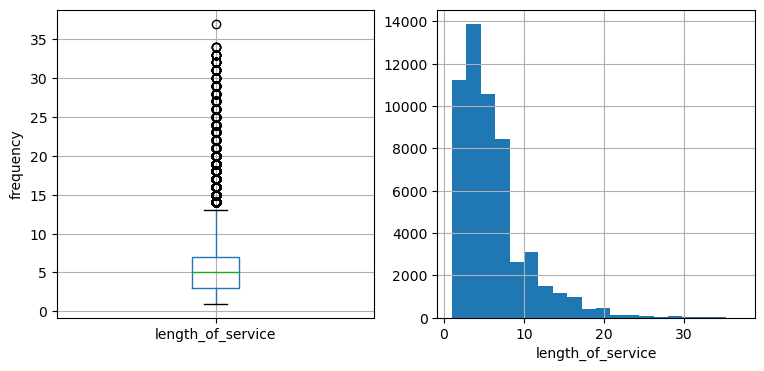

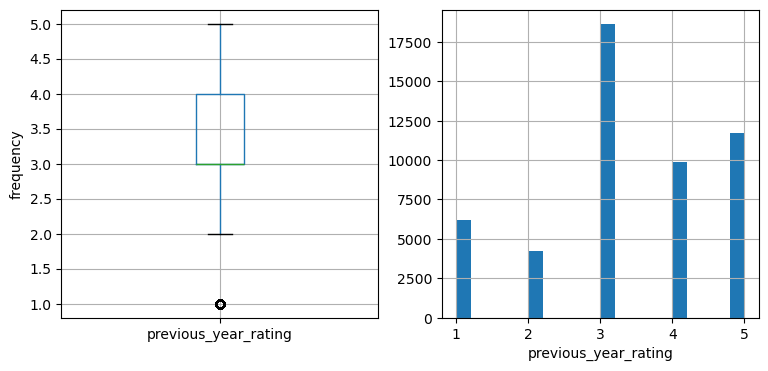

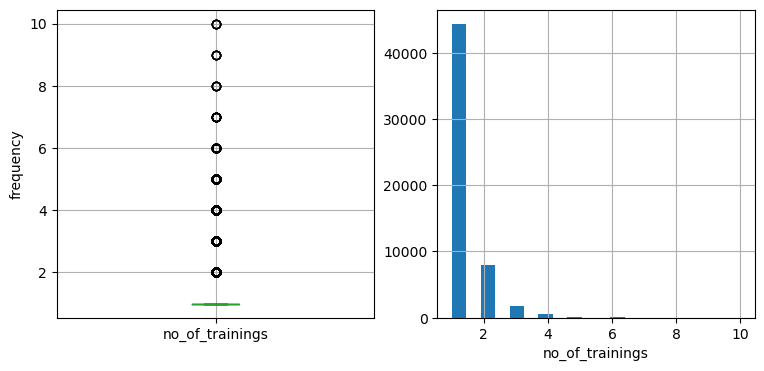

In [62]:
#for each continous column, plot the boxplot beside the histogram to see the outliers & distribution
for col in df_hr_new[['age', 'avg_training_score', 'length_of_service', 'previous_year_rating', 'no_of_trainings']]:
    plt.figure(figsize=(9,4))
    plt.subplot(1, 2, 1) #this figure has 1 row, 2 columns, and this plot is the first plot.
     
    fig = df_hr_num.boxplot(column=col)
    fig.set_ylabel('frequency')
    
    plt.subplot(1, 2, 2)
    fig = df_hr_num[col].hist(bins=20)
    fig.set_xlabel(col)

    plt.show()

before log transformation: 1.0074317710382241


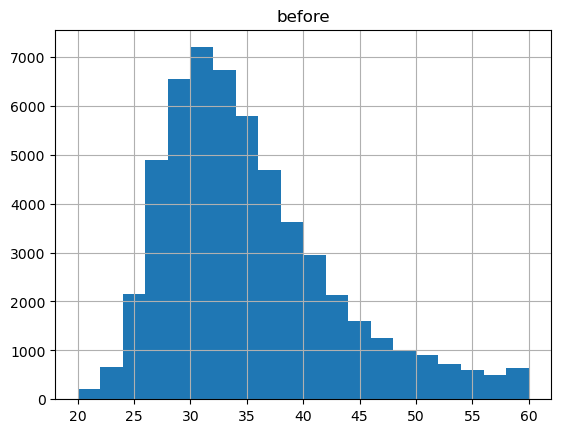

after log transformation: 0.48230408268904185


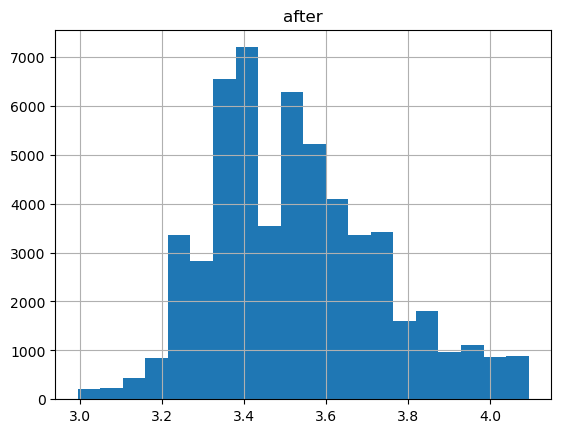

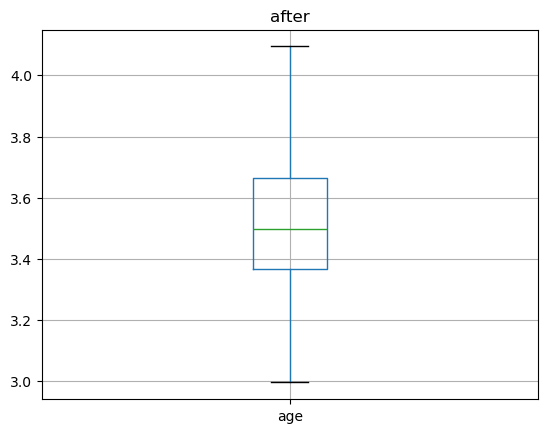

In [64]:
#1. age - handle outliers using log transformation

print('before log transformation: ' + str(df_hr_new['age'].skew()))
df_hr_new['age'].hist(bins=20) #plot a histogram 
plt.title('before')
plt.show()

df_hr_new['age'] = np.log(df_hr_new['age'])
print('after log transformation: ' + str(df_hr_new['age'].skew()))

df_hr_new['age'].hist(bins=20) #plot a histogram 
plt.title('after')
plt.show()

df_hr_new.boxplot(column='age') #plot a boxplot 
plt.title('after')
plt.show()

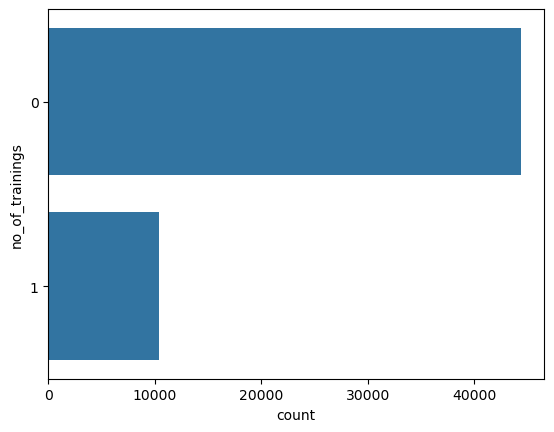

In [66]:
#2. no_of_trainings - handle outliers using binning based on mean

#0 = below average, 1 = above average
avg = df_hr_new['no_of_trainings'].mean()
df_hr_new.loc[df_hr_new['no_of_trainings'] <= avg, 'no_of_trainings'] = 0
df_hr_new.loc[df_hr_new['no_of_trainings'] > avg] = 1

#display countplot
sns.countplot(y='no_of_trainings', data=df_hr_new)
plt.show()

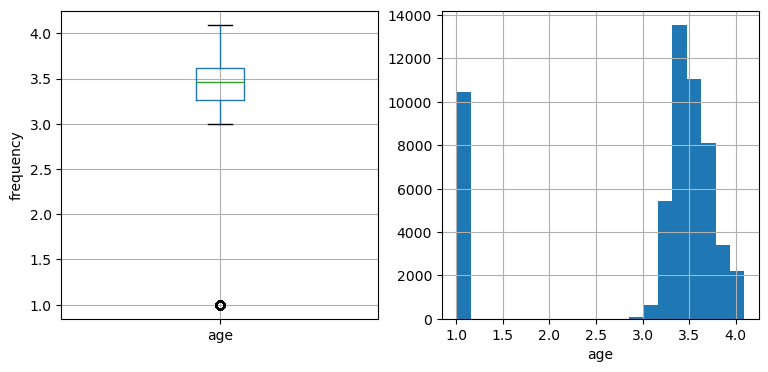

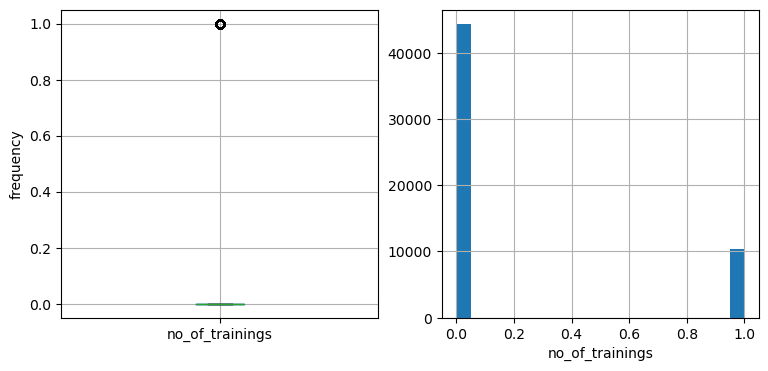

In [68]:
#for each continous column, plot the boxplot beside the histogram to see the outliers & distribution
for col in df_hr_new[['age', 'no_of_trainings']]:
    plt.figure(figsize=(9,4))
    plt.subplot(1, 2, 1) #this figure has 1 row, 2 columns, and this plot is the first plot.
     
    fig = df_hr_new.boxplot(column=col)
    fig.set_ylabel('frequency')
    
    plt.subplot(1, 2, 2)
    fig = df_hr_new[col].hist(bins=20)
    fig.set_xlabel(col)

    plt.show()

###### 1.2.7 Transform the Numeric Data Columns (Scaling)

In [71]:
#see the min & max values before scaling
df_hr_new[['age', 'avg_training_score', 'length_of_service', 'previous_year_rating']].describe()

,age,avg_training_score,length_of_service,previous_year_rating
count,54808.000000,54808.000000,54808.000000,54808.000000
mean,3.053182,51.189078,5.037640,2.890746
std,1.013288,27.063435,4.374247,1.429176
min,1.000000,1.000000,1.000000,1.000000
25%,3.258097,47.000000,1.000000,1.000000
50%,3.465736,57.000000,4.000000,3.000000
75%,3.610918,70.000000,7.000000,4.000000
max,4.094345,99.000000,34.000000,5.000000


In [73]:
#normalise age, avg_training_score, length_of_service, previous_year_rating to 0~1 using min-max normalization 

#1. age
df_hr_new["age"]=(df_hr_new["age"] - df_hr_new["age"].min()) / (df_hr_new["age"].max()-df_hr_new["age"].min())

#2. avg_training_score
df_hr_new["avg_training_score"]=(df_hr_new["avg_training_score"] - df_hr_new["avg_training_score"].min()) / (df_hr_new["avg_training_score"].max()-df_hr_new["avg_training_score"].min())

#3. length_of_service
df_hr_new["length_of_service"]=(df_hr_new["length_of_service"] - df_hr_new["length_of_service"].min()) / (df_hr_new["length_of_service"].max()-df_hr_new["length_of_service"].min())

#4. previous_year_rating
df_hr_new["previous_year_rating"]=(df_hr_new["previous_year_rating"] - df_hr_new["previous_year_rating"].min()) / (df_hr_new["previous_year_rating"].max()-df_hr_new["previous_year_rating"].min())


#see the min & max values after scaling
df_hr_new[['age', 'avg_training_score', 'length_of_service', 'previous_year_rating']].describe() 

,age,avg_training_score,length_of_service,previous_year_rating
count,54808.000000,54808.000000,54808.000000,54808.000000
mean,0.663527,0.512133,0.122353,0.472686
std,0.327464,0.276157,0.132553,0.357294
min,0.000000,0.000000,0.000000,0.000000
25%,0.729750,0.469388,0.000000,0.000000
50%,0.796852,0.571429,0.090909,0.500000
75%,0.843771,0.704082,0.181818,0.750000
max,1.000000,1.000000,1.000000,1.000000


###### 1.2.8 Check for wrong Data Types

In [76]:
df_hr_new.dtypes #check that all datatypes are numeric (int64/int32/float64)

department                int32
region                    int32
education                 int32
gender                    int32
recruitment_channel       int32
no_of_trainings           int64
age                     float64
previous_year_rating    float64
length_of_service       float64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score      float64
is_promoted               int64
dtype: object

### 1.3 Correlation Analysis

###### 1.3.1 Scatter Matrix 

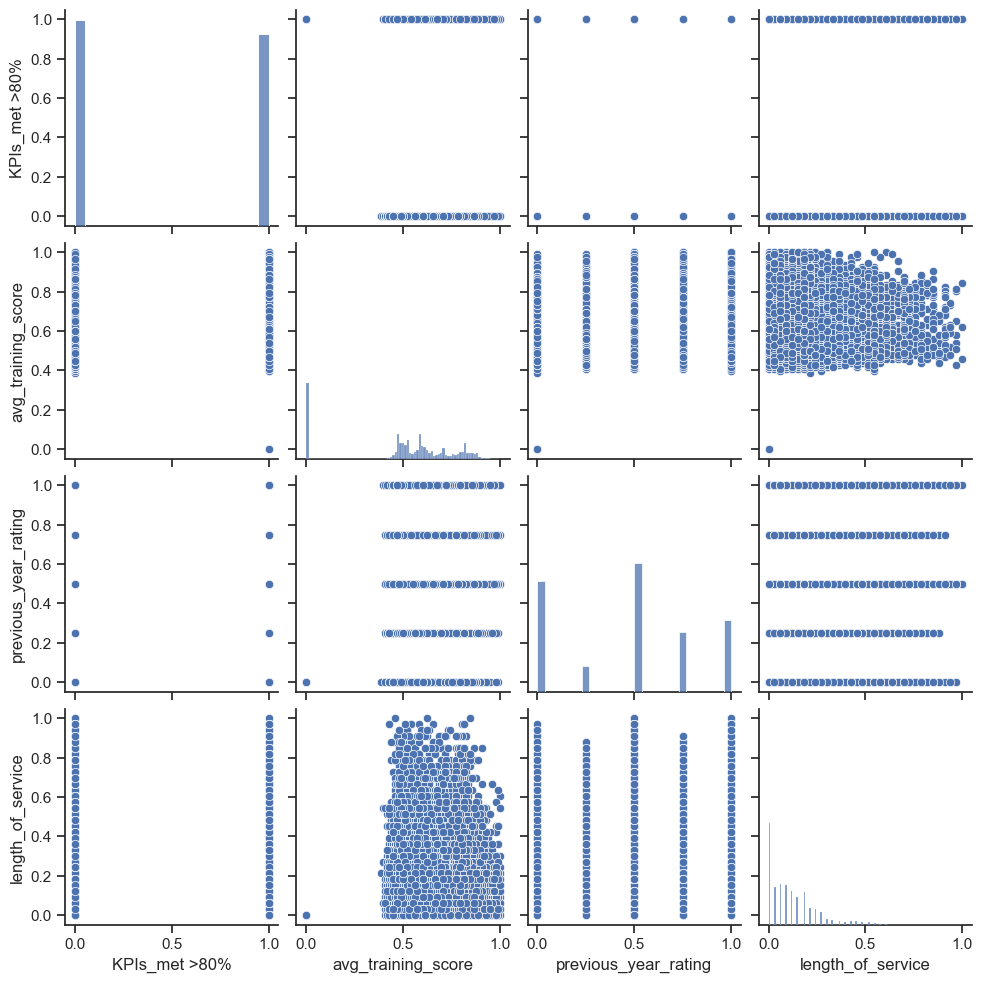

In [80]:
sns.set(style="ticks")
sns.pairplot(df_hr_new[['KPIs_met >80%', 'avg_training_score', 'previous_year_rating', 'length_of_service']]) #create scatter plots 

###### 1.3.2 Correlation Heatmap

In [86]:
df_hr_new.corr() #correlation in table format

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
department,1.000000,0.143856,0.215806,0.140052,0.180125,-0.385387,0.369075,0.273685,0.132199,-0.154756,-0.361835,0.469195,-0.313985
region,0.143856,1.000000,0.329940,0.345035,0.204161,-0.496985,0.450954,0.298185,0.091801,-0.263678,-0.466680,0.455234,-0.414757
education,0.215806,0.329940,1.000000,0.316978,0.254368,-0.561388,0.488286,0.341571,0.058672,-0.287931,-0.528612,0.493017,-0.469759
gender,0.140052,0.345035,0.316978,1.000000,0.233332,-0.539922,0.529556,0.331937,0.232875,-0.294885,-0.507912,0.473229,-0.443849
recruitment_channel,0.180125,0.204161,0.254368,0.233332,1.000000,-0.438543,0.429192,0.295073,0.187311,-0.205125,-0.411353,0.398733,-0.353803
no_of_trainings,-0.385387,-0.496985,-0.561388,-0.539922,-0.438543,1.000000,-0.982329,-0.641371,-0.447493,0.501811,0.941776,-0.899060,0.814403
age,0.369075,0.450954,0.488286,0.529556,0.429192,-0.982329,1.000000,0.634182,0.548930,-0.497154,-0.925759,0.880042,-0.802105
previous_year_rating,0.273685,0.298185,0.341571,0.331937,0.295073,-0.641371,0.634182,1.000000,0.299864,-0.100948,-0.596913,0.587944,-0.455800
length_of_service,0.132199,0.091801,0.058672,0.232875,0.187311,-0.447493,0.548930,0.299864,1.000000,-0.287747,-0.434056,0.390242,-0.372598
KPIs_met >80%,-0.154756,-0.263678,-0.287931,-0.294885,-0.205125,0.501811,-0.497154,-0.100948,-0.287747,1.000000,0.500623,-0.427225,0.518975


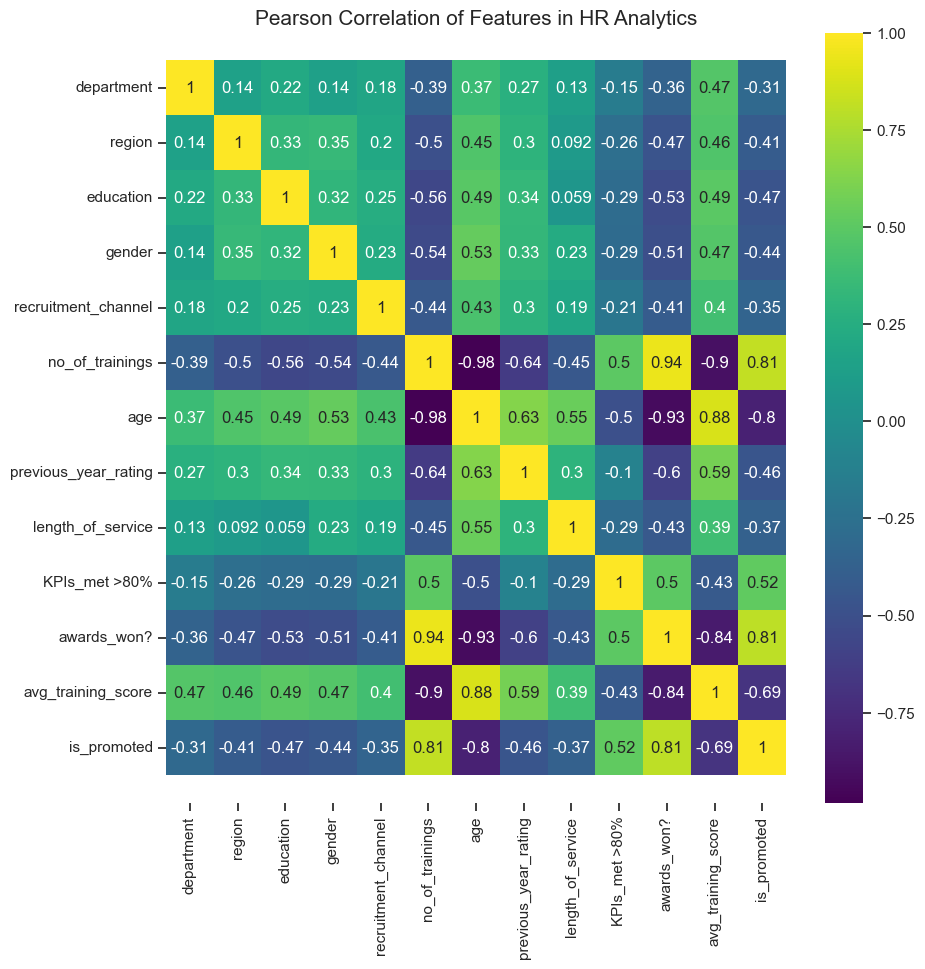

In [88]:
#correlation in table format with colors
colormap = plt.cm.viridis
plt.figure(figsize=(10,10))
plt.title('Pearson Correlation of Features in HR Analytics', size=15)
ax = sns.heatmap(df_hr_new.astype(float).corr(), cmap=colormap, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

### 1.4 Export the data

#### Data Dictionary (After data understanding and data preparation) 

Target Variable
* **is_promoted**: 0 = Recommended for promotion, 0 = Not recommended for promotion <br /><br />

Categorical Variables
* **region**: (unordered) <br />
* **department**: 1 = Sales & Marketing, 2 = Operations, 3 = Technology, 4 = Analytics, 5 = R&D, 6 = Procurement, 7 = Finance, 8 = HR, 9 = Legal <br />
* **education**: 1 = Master's & above, 2 = Bachelor's, 3 = Below Secondary <br />
* **gender**: 1 = Female, 2 = Male <br />
* **recruitment_channel**: 1 = sourcing, 2 = other, 3 = referred <br />
* **KPIs_met >80%**:  0 = KPI <= 80%, 1 = KPI > 80% (mean=0.351974) <br />
* **awards_won?**: (during prev year) 0 = No awards won, 1 = Won awards (mean=0.023172) <br />
* **no_of_trainings**: 0 = Above mean no. of trainings, 1 = Less than no. of trainings (mean=1.28) <br /><br />

Nominal Variables
* **previous_year_rating**: normalised to 0 ~ 1 (ordered 0, 1, 2, 3, 4, 5) <br />
* **age**: normalised to 0 ~ 1 (min=20, max=60) <br />
* **length_of_service**: normalised to 0 ~ 1 (min=1, max=37) <br />
* **avg_training_score**: normalised to 0 ~ 1 (min=39, max=99) <br /><br />

In [91]:
# STRATIFIED SAMPLING CHECK

df_hr_new['is_promoted'].value_counts() #check that stratified sampling is done

is_promoted
0    40468
1    14340
Name: count, dtype: int64

In [93]:
df_hr_new.to_csv('hr_data_new.csv', index=False)

In [95]:
df_hr_new_new = pd.read_csv('hr_data_new.csv') #load new csv
df_hr_new_new.head() #display first 5 and last 5 values
df_hr_new_new.tail()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
54803,3,14,2,2,1,0,0.927887,0.50,0.484848,0,0,0.785714,0
54804,2,27,1,1,2,0,0.843771,0.25,0.151515,0,0,0.561224,0
54805,4,1,2,2,2,0,0.741946,1.00,0.060606,1,0,0.795918,0
54806,1,9,2,2,1,0,0.765040,0.00,0.030303,0,0,0.448980,0
54807,8,22,2,2,2,0,0.741946,0.00,0.121212,0,0,0.489796,0


In [98]:
df_hr_new_new.describe()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,2.811542,11.697471,1.595497,1.553642,1.482503,0.190301,0.663527,0.472686,0.122353,0.482758,0.209477,0.512133,0.261641
std,2.278838,10.435190,0.514255,0.497119,0.533396,0.392542,0.327464,0.357294,0.132553,0.499707,0.406939,0.276157,0.439532
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.729750,0.000000,0.000000,0.000000,0.000000,0.469388,0.000000
50%,2.000000,7.000000,2.000000,2.000000,1.000000,0.000000,0.796852,0.500000,0.090909,0.000000,0.000000,0.571429,0.000000
75%,4.000000,22.000000,2.000000,2.000000,2.000000,0.000000,0.843771,0.750000,0.181818,1.000000,0.000000,0.704082,1.000000
max,9.000000,34.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [100]:
# STRATIFIED SAMPLING CHECK

df_hr_new['is_promoted'].value_counts() #check that stratified sampling is done

is_promoted
0    40468
1    14340
Name: count, dtype: int64